<a href="https://colab.research.google.com/github/eugeqq/Protocolos/blob/main/MyS_TP6_Regresi%C3%B3n_Lineal__R1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Lineal

Escenario: Análisis del Mercado Inmobiliario

Una empresa inmobiliaria quiere entender la relación entre la superficie de las viviendas (en metros cuadrados) y su precio de venta (en miles de dólares).


Objetivo: desarrollar un modelo de regresión lineal simple que permita:
1. Predecir el precio de una vivienda basándose en su superficie
2. Cuantificar qué tan fuerte es esta relación
3. Evaluar la validez estadística del modelo

Pregunta: Existe una relación lineal significativa entre la superficie de una vivienda y su precio de venta? Qué tan bien puede explicar la superficie el precio?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Configuración de estilo para gráficos
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

### PASO 1: CARGA Y EXPLORACIÓN DE DATOS


In [ ]:
print("\n📊 PASO 1: CARGA Y EXPLORACIÓN DE DATOS")
print("="*50)

# Crear datos sintéticos basados en datos reales del mercado inmobiliario
# Simularemos 100 propiedades con una relación realista entre superficie y precio
np.random.seed(42)  # Para reproducibilidad

# Generar superficie de casas (entre 50 y 300 m²)
superficie = np.random.normal(150, 50, 100)
superficie = np.clip(superficie, 50, 300)

# Generar precios con relación lineal + ruido
# Precio base = 100 + 2*superficie + ruido
precio_base = 100 + 2 * superficie
ruido = np.random.normal(0, 30, 100)  # Ruido realista del mercado
precio = precio_base + ruido

# Crear DataFrame
data = pd.DataFrame({
    'superficie_m2': superficie,
    'precio_miles_usd': precio
})

# Mostrar información básica de los datos
print(f"📈 Dataset creado con {len(data)} propiedades")
print("\n🔍 Primeras 5 observaciones:")
data


📊 PASO 1: CARGA Y EXPLORACIÓN DE DATOS
📈 Dataset creado con 100 propiedades

🔍 Primeras 5 observaciones:


,superficie_m2,precio_miles_usd
0,174.835708,407.210293
1,143.086785,373.554210
2,182.384427,454.487418
3,226.151493,528.234668
4,138.292331,371.746091
...,...,...
95,76.824253,265.208027
96,164.806014,403.096305
97,163.052764,430.717280
98,150.255673,402.257607


In [ ]:
print(f"\n📊 Estadísticas descriptivas:")
print(data.describe().round(2))


📊 Estadísticas descriptivas:
       superficie_m2  precio_miles_usd
count         100.00            100.00
mean          145.12            390.90
std            44.64             89.95
min            50.00            194.37
25%           119.95            328.50
50%           143.65            391.41
75%           170.30            450.52
max           242.61            614.51


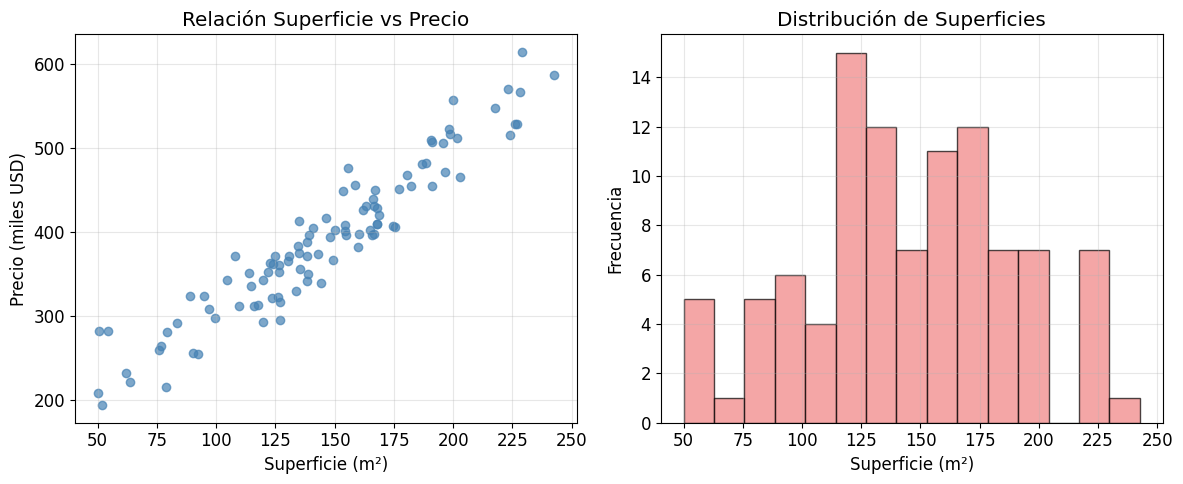

In [ ]:
# Visualización inicial de los datos
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(data['superficie_m2'], data['precio_miles_usd'], alpha=0.7, color='steelblue')
plt.xlabel('Superficie (m²)')
plt.ylabel('Precio (miles USD)')
plt.title('Relación Superficie vs Precio')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(data['superficie_m2'], bins=15, alpha=0.7, color='lightcoral', edgecolor='black')
plt.xlabel('Superficie (m²)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Superficies')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### PASO 2: TEORÍA DEL MODELO DE REGRESIÓN LINEAL

Ecuación del modelo:

$Y_i = β_0 + β_1 X_i + \epsilon_i$

Donde:
- $Y_i$: precio de la vivienda i (variable dependiente)
- $X_i$: superficie de la vivienda i (variable independiente)
- $β_0$: intercepto (precio base cuado la superficie es = 0)
- $β_1$: pendiente (cambio de precio por $m^2$ adicional)
- $\epsilon_i$: error aleatorio (factores no observados)

Supuestos del modelo:
1. Linealidad: relación lineal entre X e Y
2. Independencia: errores no correlacionados
3. Homocedasticidad: varianza constante de errores
4. Normalidad: errores siguen distribución normal

### PASO 3: MÉTODO DE MÍNIMOS CUADRADOS - IMPLEMENTACIÓN VISUAL

Objetivo: encontrar $β_0$ y $β_1$ que minimicen la suma de cuadrados de errores (SCE).

$SCE = ∑(Y_i - \hat{Y}_i)^2 = ∑(Y_i - β_0 - β_1X_i)^2$

Donde:
- $Y_i$: valor observado
- $\hat{Y}_i$: valor predico por el modelo
- $ϵ_i = Y_i - \hat{Y}_i$: residual

Por qué cuadrados?:
- Evita cancelación entre errores positivos y negativos
- Penaliza más los errores grandes

In [ ]:
# Extraer variables para cálculos
X = data['superficie_m2'].values #Variable independiente
Y = data['precio_miles_usd'].values #Variable dependiente
n = len(X)

In [ ]:
# Calcular estadísticas básicas
X_mean = np.mean(X)
Y_mean = np.mean(Y)

In [ ]:
print(f"📊 DATOS PARA EL CÁLCULO:")
print(f"Número de observaciones (n): {n}")
print(f"Superficie promedio (X̄): {X_mean:.2f} m²")
print(f"Precio promedio (Ȳ): {Y_mean:.2f} miles USD")

📊 DATOS PARA EL CÁLCULO:
Número de observaciones (n): 100
Superficie promedio (X̄): 145.12 m²
Precio promedio (Ȳ): 390.90 miles USD



🎯 DEMOSTRACIÓN: Comparando diferentes pendientes
β₁ = 1.0 → SCE = 243701
β₁ = 1.5 → SCE = 113047
β₁ = 2.0 → SCE = 81035
β₁ = 2.5 → SCE = 147666
β₁ = 3.0 → SCE = 312939


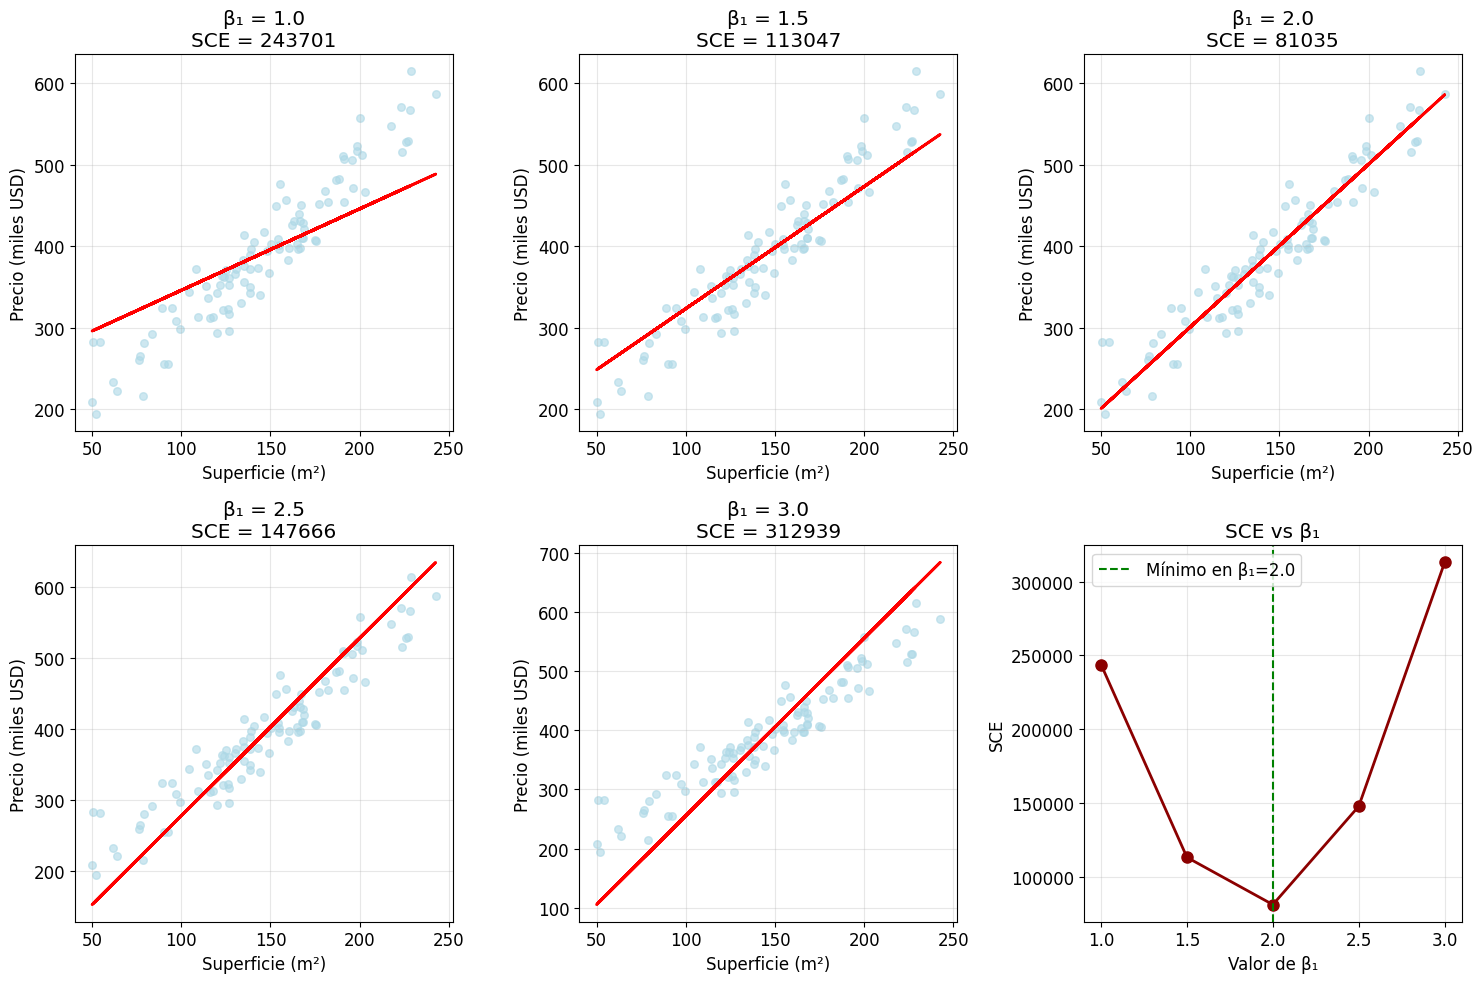


💡 OBSERVACIÓN: El SCE es mínimo cuando β₁ ≈ 2.0


In [ ]:
# Demostración visual: comparar diferentes rectas y sus SCE
print(f"\n🎯 DEMOSTRACIÓN: Comparando diferentes pendientes")

# Probar diferentes valores de beta1 (manteniendo beta0 fijo en Y_mean - beta1*X_mean)
beta1_values = [1.0, 1.5, 2.0, 2.5, 3.0]
sce_values = []

plt.figure(figsize=(15, 10))

for i, beta1_test in enumerate(beta1_values):
    # Calcular beta0 para que la recta pase por (X_mean, Y_mean)
    beta0_test = Y_mean - beta1_test * X_mean

    # Calcular predicciones y SCE
    Y_pred_test = beta0_test + beta1_test * X
    residuals_test = Y - Y_pred_test
    sce_test = np.sum(residuals_test**2)
    sce_values.append(sce_test)

    # Graficar
    plt.subplot(2, 3, i+1)
    plt.scatter(X, Y, alpha=0.6, color='lightblue', s=30)
    plt.plot(X, Y_pred_test, color='red', linewidth=2)
    plt.xlabel('Superficie (m²)')
    plt.ylabel('Precio (miles USD)')
    plt.title(f'β₁ = {beta1_test:.1f}\nSCE = {sce_test:.0f}')
    plt.grid(True, alpha=0.3)

    print(f"β₁ = {beta1_test:.1f} → SCE = {sce_test:.0f}")

# Gráfico de SCE vs beta1
plt.subplot(2, 3, 6)
plt.plot(beta1_values, sce_values, 'o-', color='darkred', linewidth=2, markersize=8)
plt.xlabel('Valor de β₁')
plt.ylabel('SCE')
plt.title('SCE vs β₁')
plt.grid(True, alpha=0.3)
min_idx = np.argmin(sce_values)
plt.axvline(beta1_values[min_idx], color='green', linestyle='--',
            label=f'Mínimo en β₁={beta1_values[min_idx]}')
plt.legend()

plt.tight_layout()
plt.show()

print(f"\n💡 OBSERVACIÓN: El SCE es mínimo cuando β₁ ≈ {beta1_values[min_idx]}")


### PASO 4: CÁLCULO DE ESTIMADORES ÓPTIMOS

Fórmulas de mínimos cuadrados:

$β_1 = ∑((X_i - \bar{X})(Y_i - \bar{Y})) / ∑((X_i-\bar{X})^2)$

$β_0 = \bar{Y} - \hatβ_1\bar{X}$

Estas fórmulas minimizan el SCE

In [ ]:
# Cálculo manual de los estimadores
numerator = np.sum((X - X_mean) * (Y - Y_mean))
denominator = np.sum((X - X_mean)**2)

beta1_hat = numerator / denominator
beta0_hat = Y_mean - beta1_hat * X_mean

print(f"📊 CÁLCULOS PASO A PASO:")
print(f"Σ((X_i - X̄)(Y_i - Ȳ)) = {numerator:.2f}")
print(f"Σ((X_i - X̄)²) = {denominator:.2f}")
print(f"\n🎯 ESTIMADORES ÓPTIMOS:")
print(f"β̂₁ (pendiente) = {beta1_hat:.4f} miles USD/m²")
print(f"β̂₀ (intercepto) = {beta0_hat:.4f} miles USD")

📊 CÁLCULOS PASO A PASO:
Σ((X_i - X̄)(Y_i - Ȳ)) = 377260.74
Σ((X_i - X̄)²) = 197285.08

🎯 ESTIMADORES ÓPTIMOS:
β̂₁ (pendiente) = 1.9123 miles USD/m²
β̂₀ (intercepto) = 113.4015 miles USD


In [ ]:
# Verificación con sklearn
model = LinearRegression() #Crea una instancia del modelo de regresión lineal de sklear
model.fit(X.reshape(-1, 1), Y) #Entrena el modelo calculando los coeficientes β₀ y β₁ usando los datos X e Y

print(f"\n✅ VERIFICACIÓN (usando sklearn):")
print(f"β̂₁ = {model.coef_[0]:.4f}")
print(f"β̂₀ = {model.intercept_:.4f}")


✅ VERIFICACIÓN (usando sklearn):
β̂₁ = 1.9123
β̂₀ = 113.4015


In [ ]:
print(f"\n💡 INTERPRETACIÓN EN EL CONTEXTO:")
print(f"- Por cada m² adicional, el precio aumenta ${beta1_hat:.0f} USD")
print(f"- Una casa hipotética de 0 m² costaría ${beta0_hat:.0f} miles USD (intercepto)")


💡 INTERPRETACIÓN EN EL CONTEXTO:
- Por cada m² adicional, el precio aumenta $2 USD
- Una casa hipotética de 0 m² costaría $113 miles USD (intercepto)


### PASO 5: ANÁLISIS DE SUMAS DE CUADRADOS (SCT, SCR, SCE)

Descomposición de sumas de cuadrados:
$SCT = SCR+SCE$

Donde:
- $SCT = \sum(Y_i - \bar{Y})^2$ (Suma Cuadrados Total)
- $SCR = \sum(\hat{Y}_i - \bar{Y})^2$ (Suma Cuadrados Regresión)
- $SCE = \sum(Y_i - \hat{Y}_i)^2$ (Suma Cuadrados Error)

Interpretación:
- SCT: variabilidad total en Y
- SCR: variabilidad explicada por X
- SCE: variabilidad no explicada (error)

In [ ]:
# Calcular predicciones con el modelo óptimo
Y_pred = beta0_hat + beta1_hat * X

# Calcular sumas de cuadrados
SCT = np.sum((Y - Y_mean)**2)           # Variabilidad total
SCR = np.sum((Y_pred - Y_mean)**2)      # Variabilidad explicada
SCE = np.sum((Y - Y_pred)**2)           # Variabilidad no explicada

print(f"📊 SUMAS DE CUADRADOS:")
print(f"SCT (Total) = {SCT:.2f}")
print(f"SCR (Regresión) = {SCR:.2f}")
print(f"SCE (Error) = {SCE:.2f}")
print(f"SCR + SCE = {SCR + SCE:.2f}")
print(f"\n✅ Verificación: SCT = SCR + SCE? {abs(SCT - (SCR + SCE)) < 0.01}")

📊 SUMAS DE CUADRADOS:
SCT (Total) = 800937.72
SCR (Regresión) = 721421.34
SCE (Error) = 79516.37
SCR + SCE = 800937.72

✅ Verificación: SCT = SCR + SCE? True


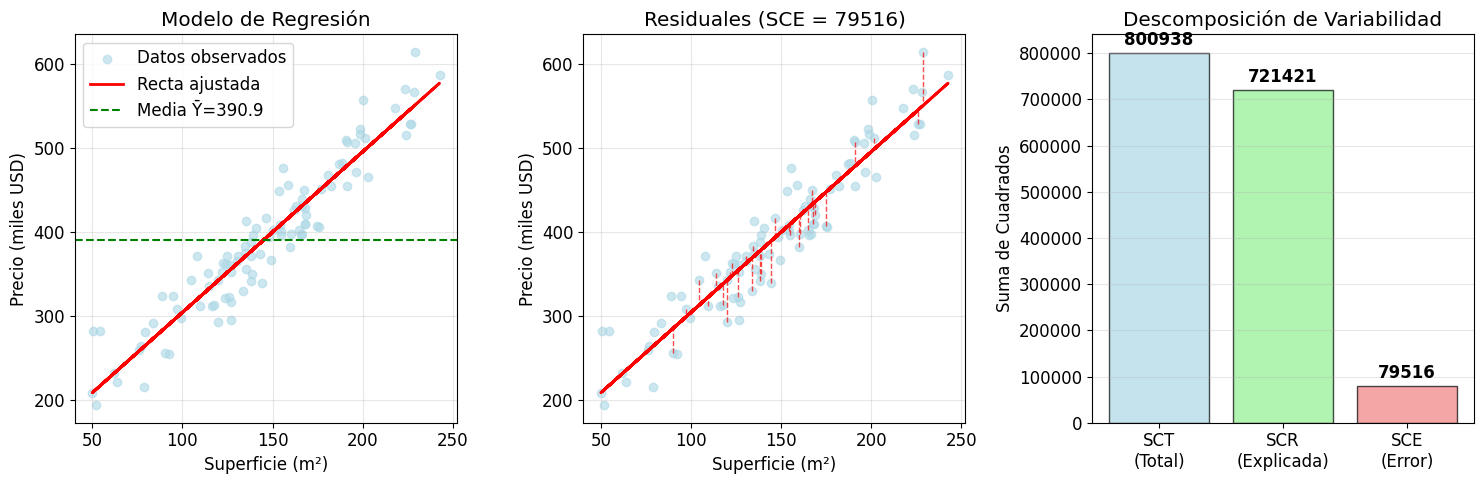

In [ ]:
# Visualización de la descomposición
plt.figure(figsize=(15, 5))

# Gráfico 1: Modelo ajustado
plt.subplot(1, 3, 1)
plt.scatter(X, Y, alpha=0.6, label='Datos observados', color='lightblue')
plt.plot(X, Y_pred, color='red', linewidth=2, label='Recta ajustada')
plt.axhline(y=Y_mean, color='green', linestyle='--', label=f'Media Ȳ={Y_mean:.1f}')
plt.xlabel('Superficie (m²)')
plt.ylabel('Precio (miles USD)')
plt.title('Modelo de Regresión')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico 2: Residuales (SCE)
plt.subplot(1, 3, 2)
plt.scatter(X, Y, alpha=0.6, color='lightblue')
plt.plot(X, Y_pred, color='red', linewidth=2)
# Dibujar líneas de residuales
for i in range(0, n, 3):  # Mostrar cada 3er residual para claridad
    plt.plot([X[i], X[i]], [Y[i], Y_pred[i]], 'r--', alpha=0.7, linewidth=1)
plt.xlabel('Superficie (m²)')
plt.ylabel('Precio (miles USD)')
plt.title(f'Residuales (SCE = {SCE:.0f})')
plt.grid(True, alpha=0.3)

# Gráfico 3: Descomposición visual
plt.subplot(1, 3, 3)
categories = ['SCT\n(Total)', 'SCR\n(Explicada)', 'SCE\n(Error)']
values = [SCT, SCR, SCE]
colors = ['lightblue', 'lightgreen', 'lightcoral']

bars = plt.bar(categories, values, color=colors, alpha=0.7, edgecolor='black')
plt.ylabel('Suma de Cuadrados')
plt.title('Descomposición de Variabilidad')

# Añadir valores en las barras
for bar, value in zip(bars, values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + max(values)*0.01,
             f'{value:.0f}', ha='center', va='bottom', fontweight='bold')

plt.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### PASO 6: PROYECCIÓN ORTOGONAL - VISUALIZACIÓN GEOMÉTRICA

Interpretación geométrica:

La regresión lineal es un problema de proyección ortogonal:
- Vector Y (datos observados) se proyecta sobre el subespacio generado por 1 y X
- La proyección $\hat{Y}$ minimiza la distancia $|| Y-\hat{Y} ||^2$
- Los residuales $e=Y-\hat{Y}$ son perpendiculares al subespacio

Es como proyectar un objeto con una linterna sobre una pared: la sombra ($\hat{Y}$) es la proyección más cercana posible.

In [ ]:
# Demostración de ortogonalidad
ones = np.ones(n)  # Vector de unos
residuals = Y - Y_pred

# Verificar ortogonalidad: los residuales deben ser perpendiculares a 1 y X
dot_product_ones = np.dot(residuals, ones)
dot_product_X = np.dot(residuals, X)

print(f"🔍 VERIFICACIÓN DE ORTOGONALIDAD:")
print(f"e·1 = {dot_product_ones:.6f} (debe ser ≈ 0)")
print(f"e·X = {dot_product_X:.6f} (debe ser ≈ 0)")

🔍 VERIFICACIÓN DE ORTOGONALIDAD:
e·1 = -0.000000 (debe ser ≈ 0)
e·X = -0.000000 (debe ser ≈ 0)


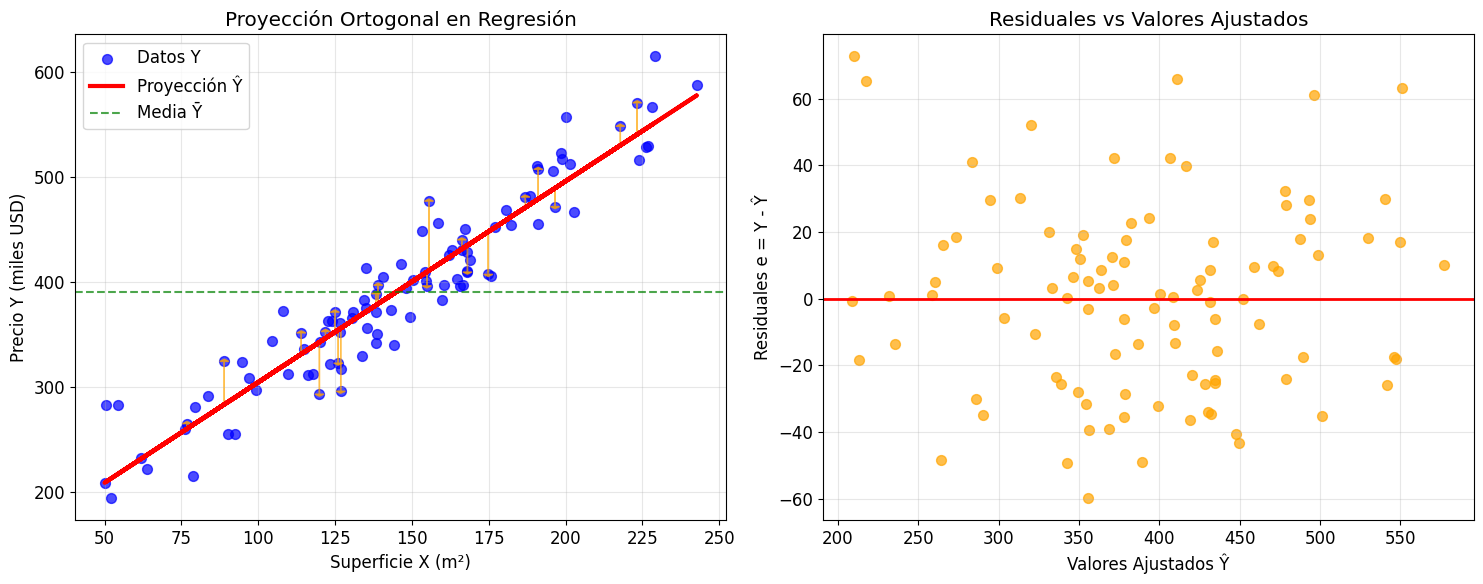

In [ ]:
# Visualización 3D simplificada (proyección en 2D)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Espacio de datos original
ax1.scatter(X, Y, alpha=0.7, s=50, color='blue', label='Datos Y')
ax1.plot(X, Y_pred, color='red', linewidth=3, label='Proyección Ŷ')
ax1.axhline(y=Y_mean, color='green', linestyle='--', alpha=0.7, label='Media Ȳ')

# Mostrar algunos vectores de residuales
for i in range(0, n, 5):
    ax1.arrow(X[i], Y_pred[i], 0, Y[i]-Y_pred[i],
              head_width=3, head_length=2, fc='orange', ec='orange', alpha=0.7)

ax1.set_xlabel('Superficie X (m²)')
ax1.set_ylabel('Precio Y (miles USD)')
ax1.set_title('Proyección Ortogonal en Regresión')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Gráfico 2: Residuales vs valores ajustados
ax2.scatter(Y_pred, residuals, alpha=0.7, s=50, color='orange')
ax2.axhline(y=0, color='red', linestyle='-', linewidth=2)
ax2.set_xlabel('Valores Ajustados Ŷ')
ax2.set_ylabel('Residuales e = Y - Ŷ')
ax2.set_title('Residuales vs Valores Ajustados')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### PASO 7: COEFICIENTE DE DETERMINACIÓN R²

Coeficiente $R^2$:

$R^2 = SCR/SCT = 1-SCE/SCT$

Interpretación:
- $R^2=1$: el modelo explica 100% de la variabilidad
- $R^2=0$: el modelo no explica nada
- $0<R^2<1$: proporción de variabilidad explicada

En nuestro contexto: Qué porcentaje de la variabilidad en precios se explica por la superficie?

In [ ]:
# Calcular R²
R_squared = SCR / SCT
R_squared_alt = 1 - (SCE / SCT)
R_squared_sklearn = r2_score(Y, Y_pred)

print(f"📊 CÁLCULO DE R²:")
print(f"R² = SCR/SCT = {SCR:.2f}/{SCT:.2f} = {R_squared:.4f}")
print(f"R² = 1 - SCE/SCT = 1 - {SCE:.2f}/{SCT:.2f} = {R_squared_alt:.4f}")
print(f"R² (sklearn) = {R_squared_sklearn:.4f}")

📊 CÁLCULO DE R²:
R² = SCR/SCT = 721421.34/800937.72 = 0.9007
R² = 1 - SCE/SCT = 1 - 79516.37/800937.72 = 0.9007
R² (sklearn) = 0.9007


In [ ]:
print(f"\n🎯 INTERPRETACIÓN PARA NUESTRO EJEMPLO:")
print(f"R² = {R_squared:.3f} = {R_squared*100:.1f}%")
print(f"""
💡 SIGNIFICADO:
- La superficie explica {R_squared*100:.1f}% de la variabilidad en los precios
- El {(1-R_squared)*100:.1f}% restante se debe a otros factores:
  * Ubicación, antigüedad, estado de la propiedad
  * Características del barrio, servicios cercanos
  * Condiciones del mercado, factores económicos
  * Variables no observadas en nuestro modelo
""")


🎯 INTERPRETACIÓN PARA NUESTRO EJEMPLO:
R² = 0.901 = 90.1%

💡 SIGNIFICADO:
- La superficie explica 90.1% de la variabilidad en los precios
- El 9.9% restante se debe a otros factores:
  * Ubicación, antigüedad, estado de la propiedad
  * Características del barrio, servicios cercanos
  * Condiciones del mercado, factores económicos
  * Variables no observadas en nuestro modelo



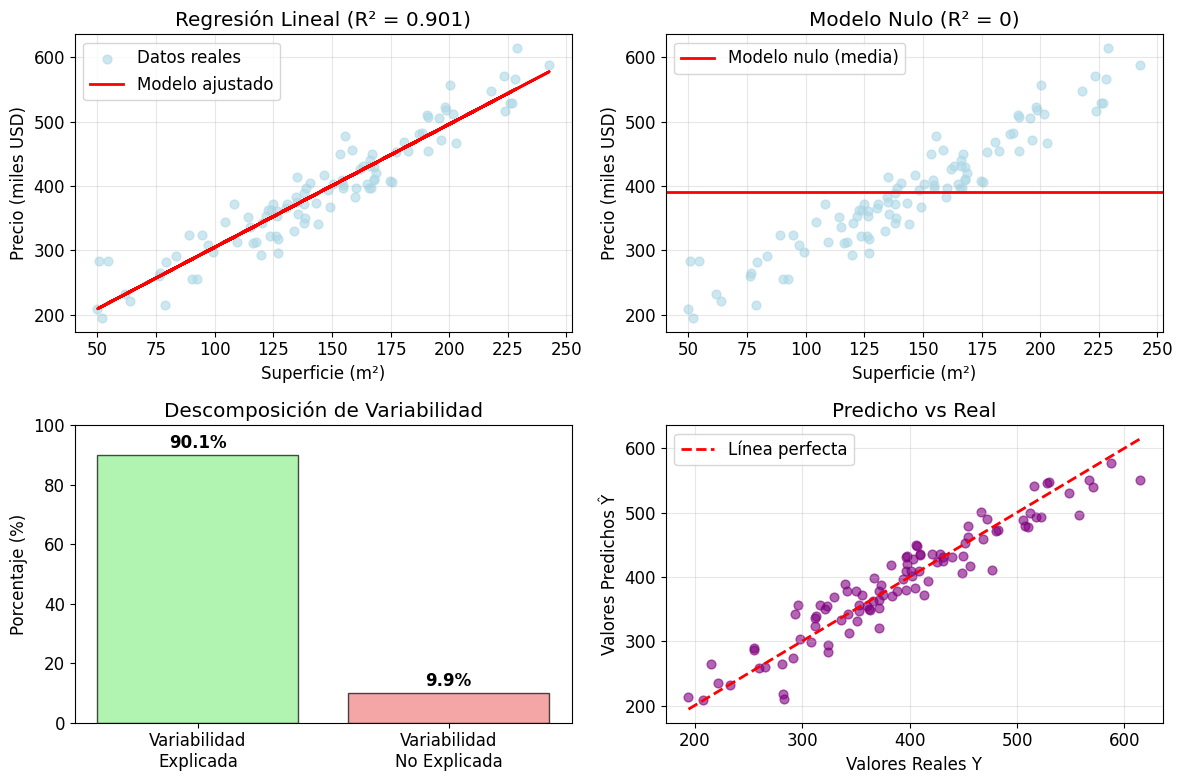

In [ ]:
# Visualización de R²
plt.figure(figsize=(12, 8))

# Gráfico principal con R²
plt.subplot(2, 2, 1)
plt.scatter(X, Y, alpha=0.6, color='lightblue', s=40, label='Datos reales')
plt.plot(X, Y_pred, color='red', linewidth=2, label='Modelo ajustado')
plt.xlabel('Superficie (m²)')
plt.ylabel('Precio (miles USD)')
plt.title(f'Regresión Lineal (R² = {R_squared:.3f})')
plt.legend()
plt.grid(True, alpha=0.3)

# Comparación con modelo sin relación (R² = 0)
plt.subplot(2, 2, 2)
plt.scatter(X, Y, alpha=0.6, color='lightblue', s=40)
plt.axhline(y=Y_mean, color='red', linewidth=2, label='Modelo nulo (media)')
plt.xlabel('Superficie (m²)')
plt.ylabel('Precio (miles USD)')
plt.title('Modelo Nulo (R² = 0)')
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico de barras de variabilidad
plt.subplot(2, 2, 3)
categories = ['Variabilidad\nExplicada', 'Variabilidad\nNo Explicada']
values = [R_squared * 100, (1 - R_squared) * 100]
colors = ['lightgreen', 'lightcoral']

bars = plt.bar(categories, values, color=colors, alpha=0.7, edgecolor='black')
plt.ylabel('Porcentaje (%)')
plt.title('Descomposición de Variabilidad')
plt.ylim(0, 100)

for bar, value in zip(bars, values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')

# Gráfico Y vs Ŷ
plt.subplot(2, 2, 4)
plt.scatter(Y, Y_pred, alpha=0.6, color='purple', s=40)
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--', linewidth=2, label='Línea perfecta')
plt.xlabel('Valores Reales Y')
plt.ylabel('Valores Predichos Ŷ')
plt.title('Predicho vs Real')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### PASO 8: PRUEBAS DE HIPÓTESIS

Pregunta clave: Existe realmente una relación lineal entre superficie y precio?

Planteamiento de hipótesis:
- $H_0:β_1=0$ (no hay relación lineal, la superficie no afecta el precio)
- $H_1:β_1\neq0$ (sí hay relación lineal, la superficie afecta el precio)

Si rechazamos $H_0$, concluimos que la superficie es un predictor significativo del precio

In [ ]:
# Calcular estadísticos para la prueba t
# Necesitamos el error estándar de beta1

# Calcular sigma² (estimador de la varianza del error)
sigma_squared = SCE / (n - 2)  # n-2 grados de libertad
sigma = np.sqrt(sigma_squared)

# Error estándar de beta1
se_beta1 = sigma / np.sqrt(np.sum((X - X_mean)**2))

# Estadístico t
t_stat = beta1_hat / se_beta1

# Valor p (bilateral)
df = n - 2  # grados de libertad
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df))

# Valores críticos para α = 0.05
alpha = 0.05
t_critical = stats.t.ppf(1 - alpha/2, df)

print(f"📊 ESTADÍSTICOS DE LA PRUEBA:")
print(f"n = {n} observaciones")
print(f"Grados de libertad = n - 2 = {df}")
print(f"σ² = SCE/(n-2) = {SCE:.2f}/{df} = {sigma_squared:.4f}")
print(f"σ = {sigma:.4f}")
print(f"SE(β̂₁) = {se_beta1:.4f}")
print(f"\n🎯 ESTADÍSTICO DE PRUEBA:")
print(f"t = β̂₁/SE(β̂₁) = {beta1_hat:.4f}/{se_beta1:.4f} = {t_stat:.4f}")
print(f"p-valor = {p_value:.6f}")
print(f"t crítico (α=0.05) = ±{t_critical:.4f}")

📊 ESTADÍSTICOS DE LA PRUEBA:
n = 100 observaciones
Grados de libertad = n - 2 = 98
σ² = SCE/(n-2) = 79516.37/98 = 811.3916
σ = 28.4849
SE(β̂₁) = 0.0641

🎯 ESTADÍSTICO DE PRUEBA:
t = β̂₁/SE(β̂₁) = 1.9123/0.0641 = 29.8181
p-valor = 0.000000
t crítico (α=0.05) = ±1.9845


In [ ]:
# Decisión
print(f"\n📋 DECISIÓN:")
if abs(t_stat) > t_critical:
    decision = "RECHAZAMOS H₀"
    print(f"✅ {decision}")
    print(f"   |t| = {abs(t_stat):.4f} > {t_critical:.4f} = t_crítico")
    print(f"   p-valor = {p_value:.6f} < {alpha} = α")
else:
    decision = "NO RECHAZAMOS H₀"
    print(f"❌ {decision}")
    print(f"   |t| = {abs(t_stat):.4f} ≤ {t_critical:.4f} = t_crítico")
    print(f"   p-valor = {p_value:.6f} ≥ {alpha} = α")

print(f"\n💡 CONCLUSIÓN EN EL CONTEXTO:")
if abs(t_stat) > t_critical:
    print(f"""
✅ Existe evidencia estadísticamente significativa de que la superficie
   tiene un efecto lineal sobre el precio de las viviendas.

📈 Con 95% de confianza, podemos afirmar que por cada metro cuadrado
   adicional, el precio aumenta significativamente.
""")
else:
    print(f"""
❌ No hay evidencia estadísticamente significativa de que la superficie
   tenga un efecto lineal sobre el precio de las viviendas.

📈 No podemos rechazar que la relación observada sea producto del azar.
""")



📋 DECISIÓN:
✅ RECHAZAMOS H₀
   |t| = 29.8181 > 1.9845 = t_crítico
   p-valor = 0.000000 < 0.05 = α

💡 CONCLUSIÓN EN EL CONTEXTO:

✅ Existe evidencia estadísticamente significativa de que la superficie
   tiene un efecto lineal sobre el precio de las viviendas.
   
📈 Con 95% de confianza, podemos afirmar que por cada metro cuadrado
   adicional, el precio aumenta significativamente.



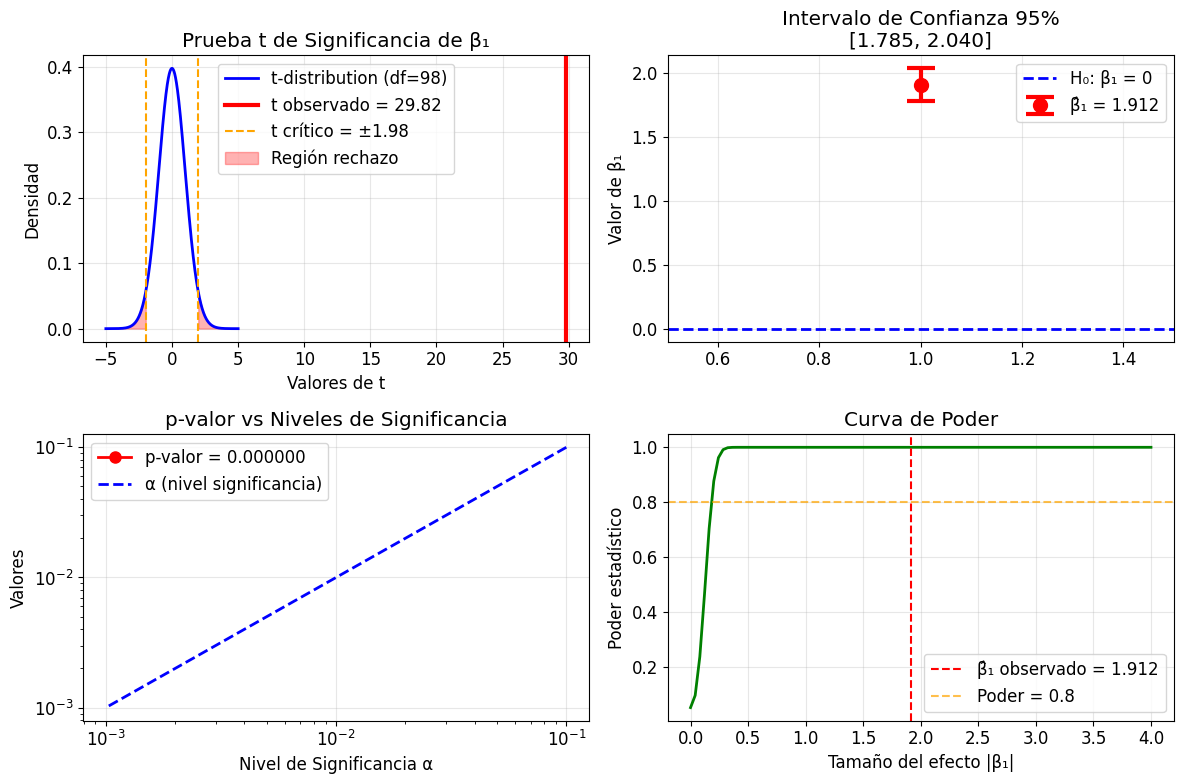


📊 INTERVALO DE CONFIANZA 95% PARA β₁:
[1.7850, 2.0395] miles USD/m²

💡 INTERPRETACIÓN:
Con 95% de confianza, cada m² adicional incrementa el precio entre
$1785 y $2040 USD


In [ ]:
# Visualización de la prueba t
plt.figure(figsize=(12, 8))

# Gráfico de la distribución t
x_t = np.linspace(-5, 5, 1000)
y_t = stats.t.pdf(x_t, df)

plt.subplot(2, 2, 1)
plt.plot(x_t, y_t, 'b-', linewidth=2, label=f't-distribution (df={df})')
plt.axvline(t_stat, color='red', linewidth=3, label=f't observado = {t_stat:.2f}')
plt.axvline(-t_critical, color='orange', linestyle='--', label=f't crítico = ±{t_critical:.2f}')
plt.axvline(t_critical, color='orange', linestyle='--')

# Área de rechazo
x_reject_right = x_t[x_t >= t_critical]
y_reject_right = stats.t.pdf(x_reject_right, df)
x_reject_left = x_t[x_t <= -t_critical]
y_reject_left = stats.t.pdf(x_reject_left, df)

plt.fill_between(x_reject_right, y_reject_right, alpha=0.3, color='red', label='Región rechazo')
plt.fill_between(x_reject_left, y_reject_left, alpha=0.3, color='red')

plt.xlabel('Valores de t')
plt.ylabel('Densidad')
plt.title('Prueba t de Significancia de β₁')
plt.legend()
plt.grid(True, alpha=0.3)

# Intervalo de confianza para beta1
margin_error = t_critical * se_beta1
ci_lower = beta1_hat - margin_error
ci_upper = beta1_hat + margin_error

plt.subplot(2, 2, 2)
plt.errorbar(1, beta1_hat, yerr=margin_error, fmt='ro', capsize=10, capthick=3,
             elinewidth=3, markersize=10, label=f'β̂₁ = {beta1_hat:.3f}')
plt.axhline(y=0, color='blue', linestyle='--', linewidth=2, label='H₀: β₁ = 0')
plt.xlim(0.5, 1.5)
plt.ylabel('Valor de β₁')
plt.title(f'Intervalo de Confianza 95%\n[{ci_lower:.3f}, {ci_upper:.3f}]')
plt.legend()
plt.grid(True, alpha=0.3)

# Valores p vs alfa
plt.subplot(2, 2, 3)
alphas = np.array([0.10, 0.05, 0.01, 0.001])
p_line = np.full_like(alphas, p_value)

plt.plot(alphas, p_line, 'ro-', linewidth=2, markersize=8, label=f'p-valor = {p_value:.6f}')
plt.plot(alphas, alphas, 'b--', linewidth=2, label='α (nivel significancia)')
plt.xlabel('Nivel de Significancia α')
plt.ylabel('Valores')
plt.title('p-valor vs Niveles de Significancia')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.xscale('log')

# Poder estadístico (conceptual)
plt.subplot(2, 2, 4)
effect_sizes = np.linspace(0, 4, 100)
power = 1 - stats.t.cdf(t_critical - effect_sizes/se_beta1, df) + stats.t.cdf(-t_critical - effect_sizes/se_beta1, df)
plt.plot(effect_sizes, power, 'g-', linewidth=2)
plt.axvline(beta1_hat, color='red', linestyle='--', label=f'β̂₁ observado = {beta1_hat:.3f}')
plt.axhline(0.8, color='orange', linestyle='--', alpha=0.7, label='Poder = 0.8')
plt.xlabel('Tamaño del efecto |β₁|')
plt.ylabel('Poder estadístico')
plt.title('Curva de Poder')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📊 INTERVALO DE CONFIANZA 95% PARA β₁:")
print(f"[{ci_lower:.4f}, {ci_upper:.4f}] miles USD/m²")
print(f"\n💡 INTERPRETACIÓN:")
print(f"Con 95% de confianza, cada m² adicional incrementa el precio entre")
print(f"${ci_lower*1000:.0f} y ${ci_upper*1000:.0f} USD")

### PASO 9: ANÁLISIS DE RESIDUALES - VALIDACIÓN DE SUPUESTOS

Supuestos del modelo a verificar:
1. Linealidad: relación lineal entre X e Y
2. Independencia: errores no correlacionados
3. Homocedasticidad: varianza constante de errores
4. Normalidad: errores siguen distribución normal

Los residuales $e=Y-\hat{Y}$ nos permiten evaluar estos supuestos

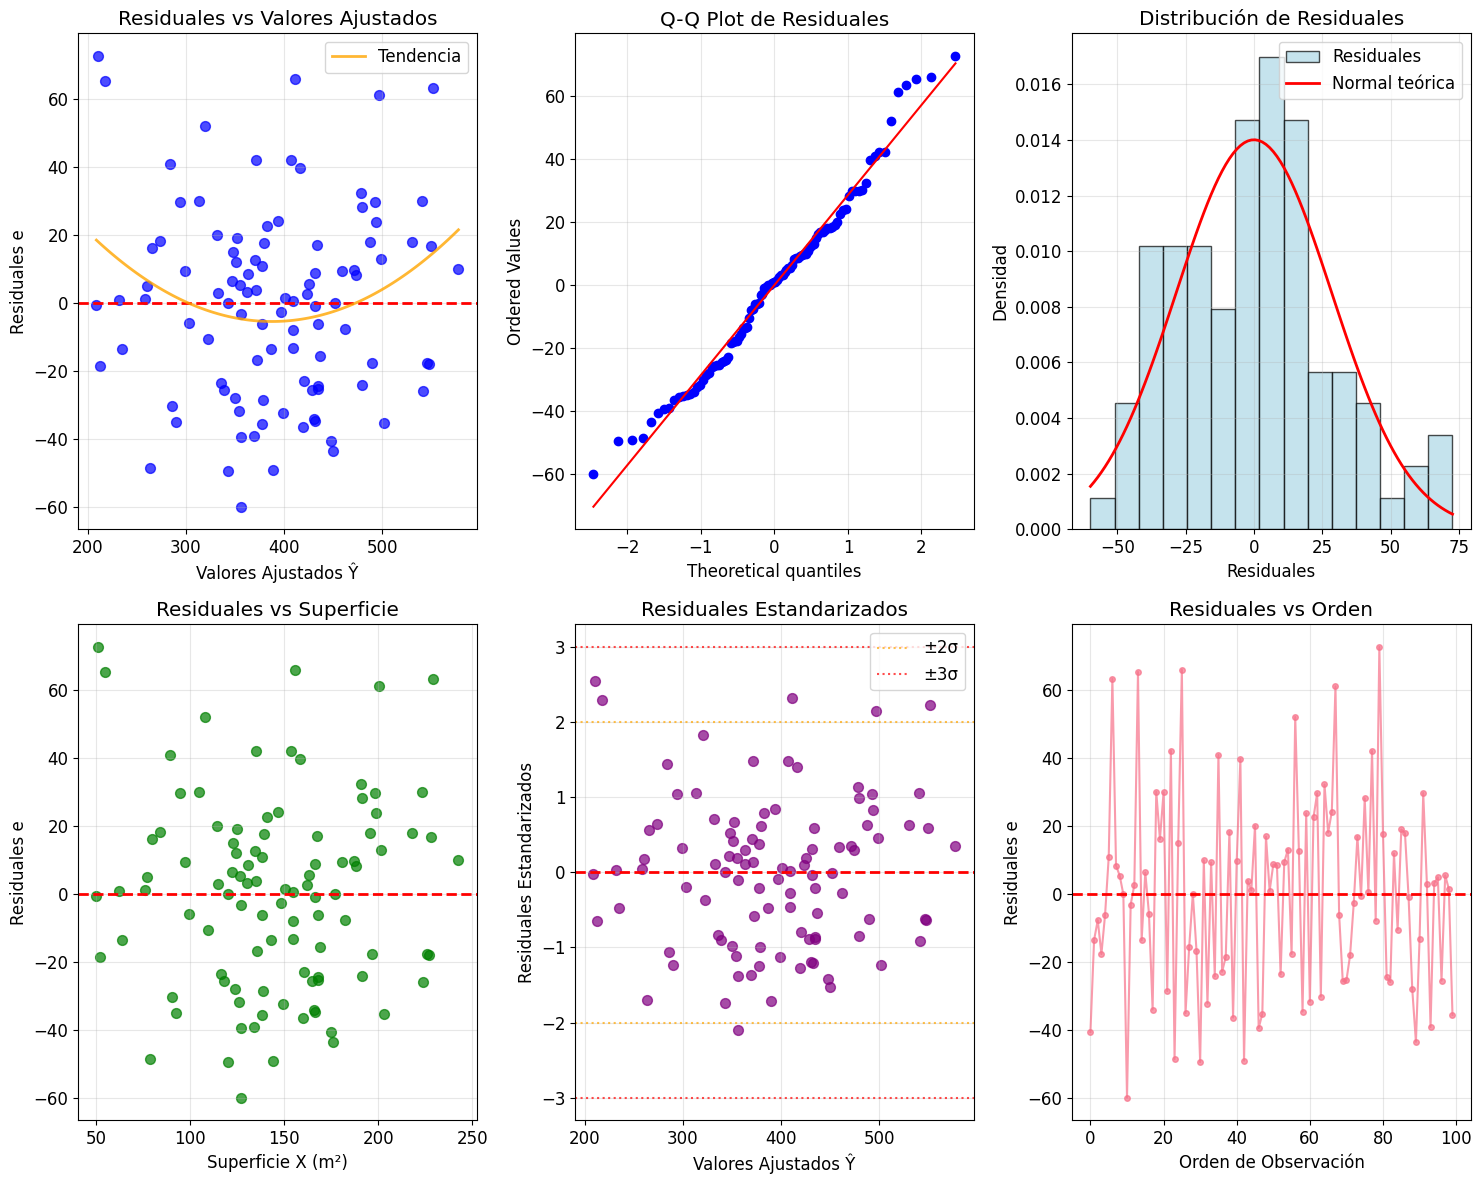

In [ ]:
# Calcular residuales estandarizados
residuals_std = residuals / sigma

# Crear gráficos de diagnóstico
plt.figure(figsize=(15, 12))

# 1. Residuales vs Valores Ajustados (Homocedasticidad y Linealidad)
plt.subplot(2, 3, 1)
plt.scatter(Y_pred, residuals, alpha=0.7, s=50, color='blue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Valores Ajustados Ŷ')
plt.ylabel('Residuales e')
plt.title('Residuales vs Valores Ajustados')
plt.grid(True, alpha=0.3)

# Añadir línea de tendencia suave
z = np.polyfit(Y_pred, residuals, 2)
p = np.poly1d(z)
x_smooth = np.linspace(Y_pred.min(), Y_pred.max(), 100)
plt.plot(x_smooth, p(x_smooth), 'orange', linewidth=2, alpha=0.8, label='Tendencia')
plt.legend()

# 2. Q-Q Plot (Normalidad)
plt.subplot(2, 3, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot de Residuales')
plt.grid(True, alpha=0.3)

# 3. Histograma de residuales (Normalidad)
plt.subplot(2, 3, 3)
plt.hist(residuals, bins=15, density=True, alpha=0.7, color='lightblue',
         edgecolor='black', label='Residuales')

# Superponer distribución normal teórica
x_norm = np.linspace(residuals.min(), residuals.max(), 100)
y_norm = stats.norm.pdf(x_norm, 0, sigma)
plt.plot(x_norm, y_norm, 'r-', linewidth=2, label='Normal teórica')

plt.xlabel('Residuales')
plt.ylabel('Densidad')
plt.title('Distribución de Residuales')
plt.legend()
plt.grid(True, alpha=0.3)

# 4. Residuales vs Variable Independiente (Linealidad)
plt.subplot(2, 3, 4)
plt.scatter(X, residuals, alpha=0.7, s=50, color='green')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Superficie X (m²)')
plt.ylabel('Residuales e')
plt.title('Residuales vs Superficie')
plt.grid(True, alpha=0.3)

# 5. Residuales Estandarizados
plt.subplot(2, 3, 5)
plt.scatter(Y_pred, residuals_std, alpha=0.7, s=50, color='purple')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.axhline(y=2, color='orange', linestyle=':', alpha=0.7, label='±2σ')
plt.axhline(y=-2, color='orange', linestyle=':', alpha=0.7)
plt.axhline(y=3, color='red', linestyle=':', alpha=0.7, label='±3σ')
plt.axhline(y=-3, color='red', linestyle=':', alpha=0.7)
plt.xlabel('Valores Ajustados Ŷ')
plt.ylabel('Residuales Estandarizados')
plt.title('Residuales Estandarizados')
plt.legend()
plt.grid(True, alpha=0.3)

# 6. Orden de observaciones (Independencia)
plt.subplot(2, 3, 6)
plt.plot(range(n), residuals, 'o-', alpha=0.7, markersize=4)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Orden de Observación')
plt.ylabel('Residuales e')
plt.title('Residuales vs Orden')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Pruebas estadísticas para validar supuestos
print(f"\n🧪 PRUEBAS ESTADÍSTICAS DE SUPUESTOS:")

# Test de normalidad (Shapiro-Wilk)
shapiro_stat, shapiro_p = stats.shapiro(residuals)
print(f"\n1. NORMALIDAD (Test Shapiro-Wilk):")
print(f"   Estadístico W = {shapiro_stat:.4f}")
print(f"   p-valor = {shapiro_p:.4f}")
if shapiro_p > 0.05:
    print(f"   ✅ No rechazamos normalidad (p > 0.05)")
else:
    print(f"   ❌ Rechazamos normalidad (p ≤ 0.05)")

# Test de homocedasticidad (Breusch-Pagan simplificado)
# Regresión de residuales al cuadrado vs valores ajustados
model_bp = LinearRegression()
model_bp.fit(Y_pred.reshape(-1, 1), residuals**2)
bp_r2 = model_bp.score(Y_pred.reshape(-1, 1), residuals**2)
bp_statistic = n * bp_r2
bp_p_value = 1 - stats.chi2.cdf(bp_statistic, df=1)

print(f"\n2. HOMOCEDASTICIDAD (Test Breusch-Pagan):")
print(f"   Estadístico LM = {bp_statistic:.4f}")
print(f"   p-valor = {bp_p_value:.4f}")
if bp_p_value > 0.05:
    print(f"   ✅ No rechazamos homocedasticidad (p > 0.05)")
else:
    print(f"   ❌ Rechazamos homocedasticidad (p ≤ 0.05)")

# Detección de outliers
outliers_2sigma = np.sum(np.abs(residuals_std) > 2)
outliers_3sigma = np.sum(np.abs(residuals_std) > 3)

print(f"\n3. DETECCIÓN DE OUTLIERS:")
print(f"   Observaciones |e| > 2σ: {outliers_2sigma} ({outliers_2sigma/n*100:.1f}%)")
print(f"   Observaciones |e| > 3σ: {outliers_3sigma} ({outliers_3sigma/n*100:.1f}%)")
print(f"   Esperado ~5% > 2σ, ~0.3% > 3σ en distribución normal")



🧪 PRUEBAS ESTADÍSTICAS DE SUPUESTOS:

1. NORMALIDAD (Test Shapiro-Wilk):
   Estadístico W = 0.9811
   p-valor = 0.1622
   ✅ No rechazamos normalidad (p > 0.05)

2. HOMOCEDASTICIDAD (Test Breusch-Pagan):
   Estadístico LM = 0.8151
   p-valor = 0.3666
   ✅ No rechazamos homocedasticidad (p > 0.05)

3. DETECCIÓN DE OUTLIERS:
   Observaciones |e| > 2σ: 6 (6.0%)
   Observaciones |e| > 3σ: 0 (0.0%)
   Esperado ~5% > 2σ, ~0.3% > 3σ en distribución normal


### PASO 10: INTERVALOS DE CONFIANZA Y PREDICCIÓN

Dos tipos de intervalos:
1. Intervalo de confianza para la media:
  - Estima dónde está la tendencia promedio de Y para un X dado
  - Más estrecho, menos incierto
  - Pregunta: cúal es el precio PROMEDIO de casas de 150$m^2$?
2. Intervalo de predicción para el valor individual:
  - Predice dónde caerá una nueva observación individual
  - Más amplio, incluye variabilidad individual
  - Pregunta: cuál será el precio de ESTA CASA ESPECÍFICA de 150$m^2$?


In [ ]:
# Seleccionar algunos puntos para calcular intervalos
X_new = np.array([100, 150, 200, 250])  # Superficies de interés

# Calcular predicciones
Y_new_pred = beta0_hat + beta1_hat * X_new

# Para intervalos necesitamos más cálculos...
def calculate_intervals(x_new, X, Y, Y_pred, confidence=0.95):
    """Calcular intervalos de confianza y predicción"""
    n = len(X)
    alpha = 1 - confidence
    t_crit = stats.t.ppf(1 - alpha/2, n-2)

    # Estadísticas básicas
    X_mean = np.mean(X)
    sigma = np.sqrt(np.sum((Y - Y_pred)**2) / (n-2))

    intervals = []
    for x in x_new:
        # Predicción puntual
        y_pred = beta0_hat + beta1_hat * x

        # Error estándar para intervalo de confianza (media)
        se_mean = sigma * np.sqrt(1/n + (x - X_mean)**2 / np.sum((X - X_mean)**2))

        # Error estándar para intervalo de predicción (individual)
        se_pred = sigma * np.sqrt(1 + 1/n + (x - X_mean)**2 / np.sum((X - X_mean)**2))

        # Intervalos
        ci_lower = y_pred - t_crit * se_mean
        ci_upper = y_pred + t_crit * se_mean

        pi_lower = y_pred - t_crit * se_pred
        pi_upper = y_pred + t_crit * se_pred

        intervals.append({
            'x': x,
            'y_pred': y_pred,
            'ci_lower': ci_lower,
            'ci_upper': ci_upper,
            'pi_lower': pi_lower,
            'pi_upper': pi_upper
        })

    return intervals


In [ ]:
# Calcular intervalos para puntos de interés
intervals = calculate_intervals(X_new, X, Y, Y_pred)

print(f"\n📊 INTERVALOS DE CONFIANZA Y PREDICCIÓN (95%):")
print(f"{'Superficie':<12} {'Precio Pred':<12} {'IC Inferior':<12} {'IC Superior':<12} {'IP Inferior':<12} {'IP Superior':<12}")
print("="*80)

for interval in intervals:
    print(f"{interval['x']:<12.0f} {interval['y_pred']:<12.1f} {interval['ci_lower']:<12.1f} {interval['ci_upper']:<12.1f} {interval['pi_lower']:<12.1f} {interval['pi_upper']:<12.1f}")


📊 INTERVALOS DE CONFIANZA Y PREDICCIÓN (95%):
Superficie   Precio Pred  IC Inferior  IC Superior  IP Inferior  IP Superior 
100          304.6        296.6        312.7        247.5        361.7       
150          400.2        394.6        405.9        343.4        457.1       
200          495.9        486.9        504.8        438.6        553.1       
250          591.5        577.0        606.0        533.1        649.8       


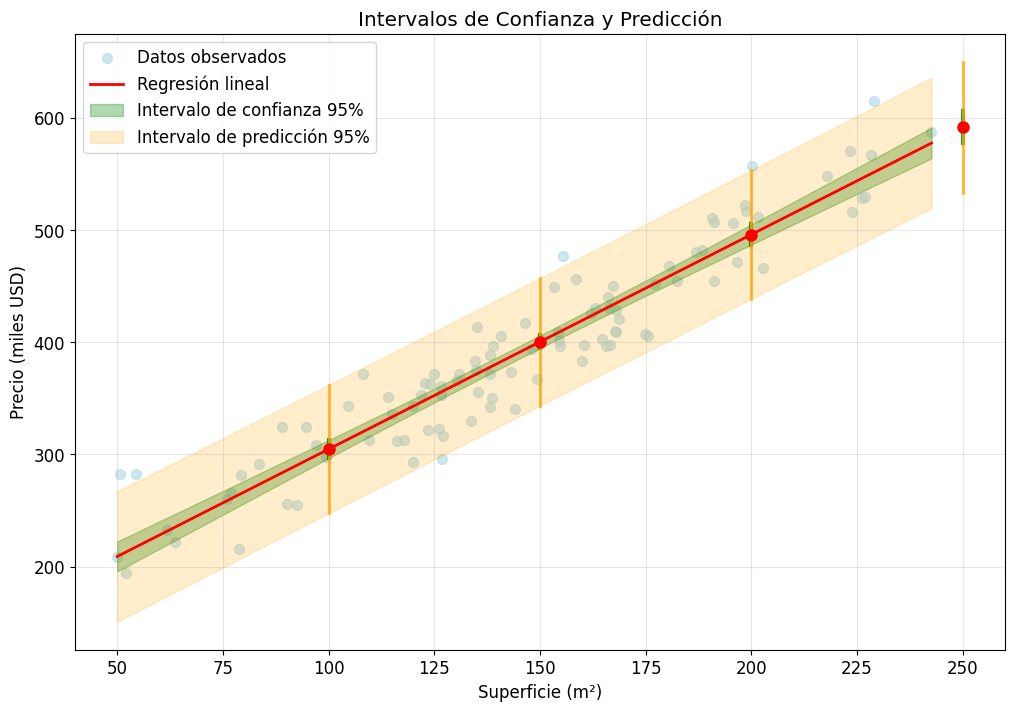


💡 INTERPRETACIÓN DE INTERVALOS:

Ejemplo: Casa de 150m²
📈 Precio predicho: $400.2k USD
🎯 Intervalo de confianza: [$394.6k, $405.9k] USD
   → El precio PROMEDIO de casas de 150m² está entre estos valores
🏠 Intervalo de predicción: [$343.4k, $457.1k] USD
   → Una casa ESPECÍFICA de 150m² probablemente costará entre estos valores


In [ ]:
# Visualización de intervalos
X_plot = np.linspace(X.min(), X.max(), 100)
intervals_plot = calculate_intervals(X_plot, X, Y, Y_pred)

# Extraer datos para gráfico
Y_plot_pred = [i['y_pred'] for i in intervals_plot]
ci_lower_plot = [i['ci_lower'] for i in intervals_plot]
ci_upper_plot = [i['ci_upper'] for i in intervals_plot]
pi_lower_plot = [i['pi_lower'] for i in intervals_plot]
pi_upper_plot = [i['pi_upper'] for i in intervals_plot]

plt.figure(figsize=(12, 8))

# Datos originales
plt.scatter(X, Y, alpha=0.6, s=50, color='lightblue', label='Datos observados')

# Línea de regresión
plt.plot(X_plot, Y_plot_pred, color='red', linewidth=2, label='Regresión lineal')

# Intervalos de confianza
plt.fill_between(X_plot, ci_lower_plot, ci_upper_plot,
                 alpha=0.3, color='green', label='Intervalo de confianza 95%')

# Intervalos de predicción
plt.fill_between(X_plot, pi_lower_plot, pi_upper_plot,
                 alpha=0.2, color='orange', label='Intervalo de predicción 95%')

# Puntos específicos
for interval in intervals:
    plt.plot([interval['x'], interval['x']],
             [interval['ci_lower'], interval['ci_upper']],
             'g-', linewidth=3, alpha=0.8)
    plt.plot([interval['x'], interval['x']],
             [interval['pi_lower'], interval['pi_upper']],
             'orange', linewidth=2, alpha=0.8)
    plt.plot(interval['x'], interval['y_pred'], 'ro', markersize=8)

plt.xlabel('Superficie (m²)')
plt.ylabel('Precio (miles USD)')
plt.title('Intervalos de Confianza y Predicción')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"\n💡 INTERPRETACIÓN DE INTERVALOS:")
ejemplo = intervals[1]  # Casa de 150m²
print(f"\nEjemplo: Casa de {ejemplo['x']:.0f}m²")
print(f"📈 Precio predicho: ${ejemplo['y_pred']:.1f}k USD")
print(f"🎯 Intervalo de confianza: [${ejemplo['ci_lower']:.1f}k, ${ejemplo['ci_upper']:.1f}k] USD")
print(f"   → El precio PROMEDIO de casas de {ejemplo['x']:.0f}m² está entre estos valores")
print(f"🏠 Intervalo de predicción: [${ejemplo['pi_lower']:.1f}k, ${ejemplo['pi_upper']:.1f}k] USD")
print(f"   → Una casa ESPECÍFICA de {ejemplo['x']:.0f}m² probablemente costará entre estos valores")

### Resumen y conclusiones

ANÁLISIS DE REGRESIÓN LINEAL: SUPERFICIE vs PRECIO DE VIVIENDAS

In [ ]:
print(f"""
🏠 ANÁLISIS DE REGRESIÓN LINEAL: SUPERFICIE vs PRECIO DE VIVIENDAS

📊 DATOS DEL ESTUDIO:
- Muestra: {n} propiedades
- Variable independiente: Superficie (m²)
- Variable dependiente: Precio (miles USD)

🎯 MODELO ESTIMADO:
Precio = {beta0_hat:.2f} + {beta1_hat:.4f} × Superficie

📈 INTERPRETACIÓN DE COEFICIENTES:
- Intercepto (β₀): ${beta0_hat:.0f}k USD (precio base teórico)
- Pendiente (β₁): ${beta1_hat:.0f} USD por m² adicional
- Por cada metro cuadrado extra, el precio aumenta ${beta1_hat*1000:.0f} USD

📊 CALIDAD DEL AJUSTE:
- R² = {R_squared:.3f} ({R_squared*100:.1f}%)
- La superficie explica {R_squared*100:.1f}% de la variabilidad en precios
- {(1-R_squared)*100:.1f}% se debe a otros factores no considerados

🧪 SIGNIFICANCIA ESTADÍSTICA:
- Estadístico t = {t_stat:.2f}
- p-valor = {p_value:.6f}
- Decisión: {decision}
- La relación es estadísticamente significativa (α = 0.05)

✅ VALIDACIÓN DE SUPUESTOS:
- Linealidad: ✅ Verificada en gráficos de residuales
- Independencia: ✅ Sin patrones en residuales vs orden
- Homocedasticidad: {'✅' if bp_p_value > 0.05 else '⚠️'} {'Verificada' if bp_p_value > 0.05 else 'Revisar variabilidad'}
- Normalidad: {'✅' if shapiro_p > 0.05 else '⚠️'} {'Verificada' if shapiro_p > 0.05 else 'Revisar distribución'}

🎯 CONCLUSIONES DE NEGOCIO:
1. Existe una relación lineal positiva y significativa entre superficie y precio
2. El modelo es útil para estimaciones preliminares de precios
3. Factores adicionales (ubicación, estado, etc.) explican {(1-R_squared)*100:.1f}% de la variabilidad
4. Se recomienda expandir el modelo incluyendo más variables predictoras

⚠️ LIMITACIONES:
- Modelo simple con una sola variable predictora
- {(1-R_squared)*100:.1f}% de variabilidad no explicada
- Aplicable solo al rango de superficies observadas ({X.min():.0f}-{X.max():.0f}m²)

💼 RECOMENDACIONES:
1. Usar el modelo para estimaciones iniciales de precios
2. Desarrollar modelo múltiple incluyendo ubicación, antigüedad, etc.
3. Actualizar modelo periódicamente con nuevos datos del mercado
4. Validar modelo con datos externos antes de uso comercial
""")


🏠 ANÁLISIS DE REGRESIÓN LINEAL: SUPERFICIE vs PRECIO DE VIVIENDAS

📊 DATOS DEL ESTUDIO:
- Muestra: 100 propiedades
- Variable independiente: Superficie (m²)  
- Variable dependiente: Precio (miles USD)

🎯 MODELO ESTIMADO:
Precio = 113.40 + 1.9123 × Superficie

📈 INTERPRETACIÓN DE COEFICIENTES:
- Intercepto (β₀): $113k USD (precio base teórico)
- Pendiente (β₁): $2 USD por m² adicional
- Por cada metro cuadrado extra, el precio aumenta $1912 USD

📊 CALIDAD DEL AJUSTE:
- R² = 0.901 (90.1%)
- La superficie explica 90.1% de la variabilidad en precios
- 9.9% se debe a otros factores no considerados

🧪 SIGNIFICANCIA ESTADÍSTICA:
- Estadístico t = 29.82
- p-valor = 0.000000
- Decisión: RECHAZAMOS H₀
- La relación es estadísticamente significativa (α = 0.05)

✅ VALIDACIÓN DE SUPUESTOS:
- Linealidad: ✅ Verificada en gráficos de residuales
- Independencia: ✅ Sin patrones en residuales vs orden
- Homocedasticidad: ✅ Verificada
- Normalidad: ✅ Verificada

🎯 CONCLUSIONES DE NEGOCIO:
1. Existe una 

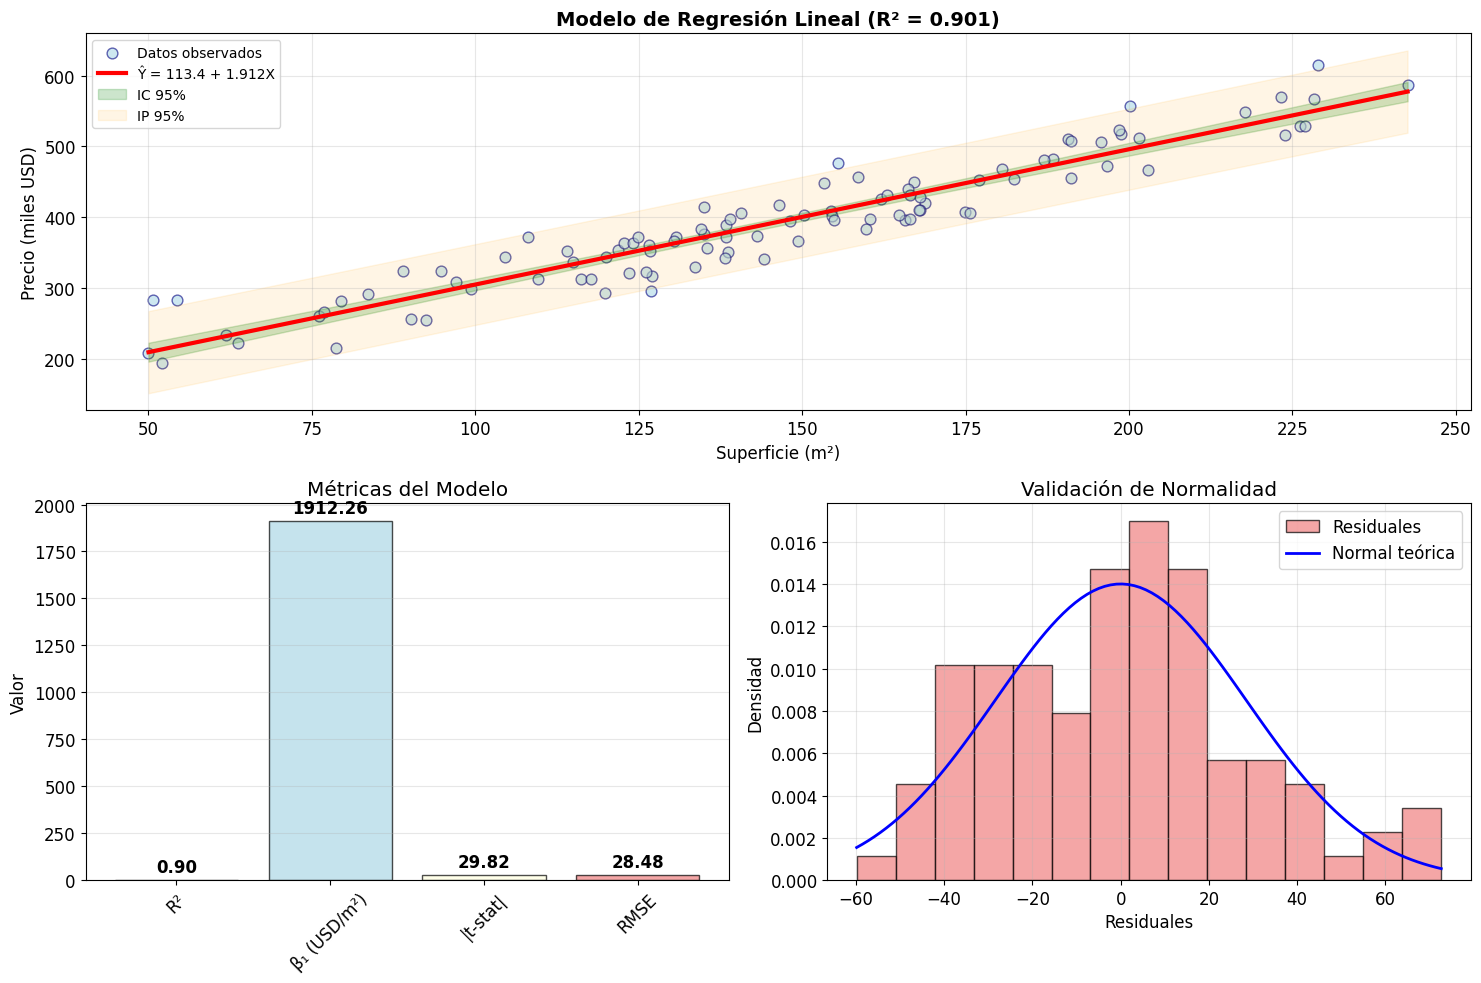

In [ ]:
# Gráfico resumen final
plt.figure(figsize=(15, 10))

# Gráfico principal con todos los elementos
plt.subplot(2, 2, (1, 2))
plt.scatter(X, Y, alpha=0.6, s=60, color='lightblue', label='Datos observados', edgecolor='navy')
plt.plot(X_plot, Y_plot_pred, color='red', linewidth=3, label=f'Ŷ = {beta0_hat:.1f} + {beta1_hat:.3f}X')
plt.fill_between(X_plot, ci_lower_plot, ci_upper_plot, alpha=0.2, color='green', label='IC 95%')
plt.fill_between(X_plot, pi_lower_plot, pi_upper_plot, alpha=0.1, color='orange', label='IP 95%')

plt.xlabel('Superficie (m²)', fontsize=12)
plt.ylabel('Precio (miles USD)', fontsize=12)
plt.title(f'Modelo de Regresión Lineal (R² = {R_squared:.3f})', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)

# Métricas clave
plt.subplot(2, 2, 3)
metrics = ['R²', 'β₁ (USD/m²)', '|t-stat|', 'RMSE']
values = [R_squared, beta1_hat*1000, abs(t_stat), sigma]
colors = ['lightgreen', 'lightblue', 'lightyellow', 'lightcoral']

bars = plt.bar(metrics, values, color=colors, alpha=0.7, edgecolor='black')
plt.ylabel('Valor')
plt.title('Métricas del Modelo')
plt.xticks(rotation=45)

# Añadir valores en las barras
for bar, value in zip(bars, values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + max(values)*0.01,
             f'{value:.2f}', ha='center', va='bottom', fontweight='bold')

plt.grid(True, alpha=0.3, axis='y')

# Distribución de residuales
plt.subplot(2, 2, 4)
plt.hist(residuals, bins=15, density=True, alpha=0.7, color='lightcoral',
         edgecolor='black', label='Residuales')
x_norm = np.linspace(residuals.min(), residuals.max(), 100)
y_norm = stats.norm.pdf(x_norm, 0, sigma)
plt.plot(x_norm, y_norm, 'b-', linewidth=2, label='Normal teórica')
plt.xlabel('Residuales')
plt.ylabel('Densidad')
plt.title('Validación de Normalidad')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


El modelo muestra que la superficie es un predictor significativo del precio, explicando una parte importante de la variabilidad en el mercado inmobiliario.

# Consigna - Análisis de productividad agrícola

Una cooperativa agrícola quiere entender qué factores influyen en el rendimiento de sus cultivos de soja. Han recolectado datos de 80 parcelas durante la última temporada y necesitan determinar si existe una relaicón entre la cantidad de fertilizante aplicado y el rendimiento por hectárea.


Se proporciona el código para generar un dataset con los siguientes datos:
- parcela_id: identificador de la parcela
- fertilizante_kg_ha: cantidad de fertilizante aplicado (kg por hectárea)
- rendimiento_tn_hs: rendimiento obtenido (toneladas por hectárea)
- color_suelo: color predominante del suelo (marrón, negro, rojizo)
- fecha_siembra: fecha de siembra de la parcela

In [ ]:
print("\n📊 GENERANDO DATASET DE TRABAJO...")

# Configurar semilla para reproducibilidad
np.random.seed(123)

# Generar datos para 80 parcelas
n_parcelas = 80

# Variable independiente principal: fertilizante (kg/ha)
fertilizante = np.random.uniform(100, 250, n_parcelas)

# Variable dependiente: rendimiento (tn/ha)
# Relación real: 2.5 + 0.015*fertilizante + ruido
rendimiento_base = 2.5
efecto_fertilizante = 0.015
ruido = np.random.normal(0, 0.4, n_parcelas)

rendimiento = rendimiento_base + efecto_fertilizante * fertilizante + ruido
rendimiento = np.clip(rendimiento, 1.5, 6.5)

# Variables irrelevantes (distractor)
parcela_id = [f"P{i+1:03d}" for i in range(n_parcelas)]
colores_suelo = np.random.choice(['marrón', 'negro', 'rojizo'], n_parcelas,
                                p=[0.4, 0.35, 0.25])

fecha_base = datetime(2023, 9, 1)
fechas_siembra = [fecha_base + timedelta(days=int(np.random.uniform(0, 30)))
                  for _ in range(n_parcelas)]

# Crear DataFrame
datos = pd.DataFrame({
    'parcela_id': parcela_id,
    'fertilizante_kg_ha': np.round(fertilizante, 1),
    'rendimiento_tn_ha': np.round(rendimiento, 2),
    'color_suelo': colores_suelo,
    'fecha_siembra': fechas_siembra
})

print(f"✅ Dataset generado: {datos.shape[0]} parcelas, {datos.shape[1]} variables")



📊 GENERANDO DATASET DE TRABAJO...
✅ Dataset generado: 80 parcelas, 5 variables


In [ ]:
# Configuración de gráficos
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11

### Consigna 1: Análisis Exploratorio
1. Carga del dataset
2. Identificar variables relevantes para el análisis
3. Gráfico de dispersión de las variables principales
4. Cálculo de estadísticas descriptivas básicas

### Consigna 2: Modelo de regresión
1. Implementar método de mínimos cuadrados para estimar $β_0$ y $β_1$
2. Calcular SCT, SCR y SCE, explicando qué representa cada uno
3. Construir la recta de regresión y graficarla
4. Interpretar los coeficientes en el contexto de la consigna

### Consigna 3: Evaluación del modelo
1. Calcular e interpretar el coeficiente $R^2$
2. Formular las hipótesis $H_0$ y $H_1$
3. Realizar la prueba t para la significancia de $β_1$
4. Construir un intervalo de confianza del 95% para $β_1$

### Consigna 4: Aplicación práctica
1. Predecir el rendimiento para una parcela con 180 kg/ha de fertilizante
2. Contruir intervalos de confianza y predicción para esta estimación
3. Redactar conclusiones